Build a regression model.

In [36]:
import requests
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes = True)
import statsmodels.api as sm 

In [37]:
df_bike_stations = pd.read_csv("../data/df_bike_stations.csv")
df_joined_data = pd.read_csv("../data/df_joined_data.csv")
df_yelp_revised = pd.read_csv("../data/df_yelp_restaurant_data_revised.csv")

In [38]:
df_joined_data.corr(numeric_only=True)

,Unnamed: 0,Latitude,Longitude,free_bikes,Distance,review_count,rating
Unnamed: 0,1.000000,-0.357703,0.136694,-0.076091,0.104007,-0.120867,-0.068434
Latitude,-0.357703,1.000000,0.082968,-0.068008,0.071150,-0.087214,0.025543
Longitude,0.136694,0.082968,1.000000,-0.046309,0.147409,-0.319372,0.001756
free_bikes,-0.076091,-0.068008,-0.046309,1.000000,NaN,NaN,NaN
Distance,0.104007,0.071150,0.147409,NaN,1.000000,0.018862,0.137758
review_count,-0.120867,-0.087214,-0.319372,NaN,0.018862,1.000000,-0.049951
rating,-0.068434,0.025543,0.001756,NaN,0.137758,-0.049951,1.000000


In [39]:
df_joined_data.describe()

,Unnamed: 0,Latitude,Longitude,free_bikes,Distance,review_count,rating
count,2032.000000,2032.000000,2032.000000,186.000000,1846.000000,1846.000000,1846.000000
mean,1015.500000,43.290254,5.386212,1.989247,529.997291,50.554713,4.096154
std,586.732193,0.020742,0.017772,2.887043,354.168354,62.501946,0.567256
min,0.000000,43.225410,5.348460,0.000000,6.000000,1.000000,1.000000
25%,507.750000,43.280557,5.373420,0.000000,227.000000,11.000000,4.000000
50%,1015.500000,43.293486,5.384893,1.000000,453.500000,30.000000,4.000000
75%,1523.250000,43.301596,5.396830,2.750000,827.750000,63.000000,4.500000
max,2031.000000,43.347800,5.446445,15.000000,1397.000000,386.000000,5.000000


In [40]:
df_bike_stations.describe()

,Unnamed: 0,Latitude,Longitude,free_bikes,Name
count,186.000000,186.000000,186.000000,186.000000,0.0
mean,92.500000,43.290221,5.387147,1.989247,NaN
std,53.837719,0.021789,0.018266,2.887043,NaN
min,0.000000,43.231562,5.349700,0.000000,NaN
25%,46.250000,43.279534,5.374212,0.000000,NaN
50%,92.500000,43.292736,5.385936,1.000000,NaN
75%,138.750000,43.304165,5.397567,2.750000,NaN
max,185.000000,43.340804,5.436933,15.000000,NaN


c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


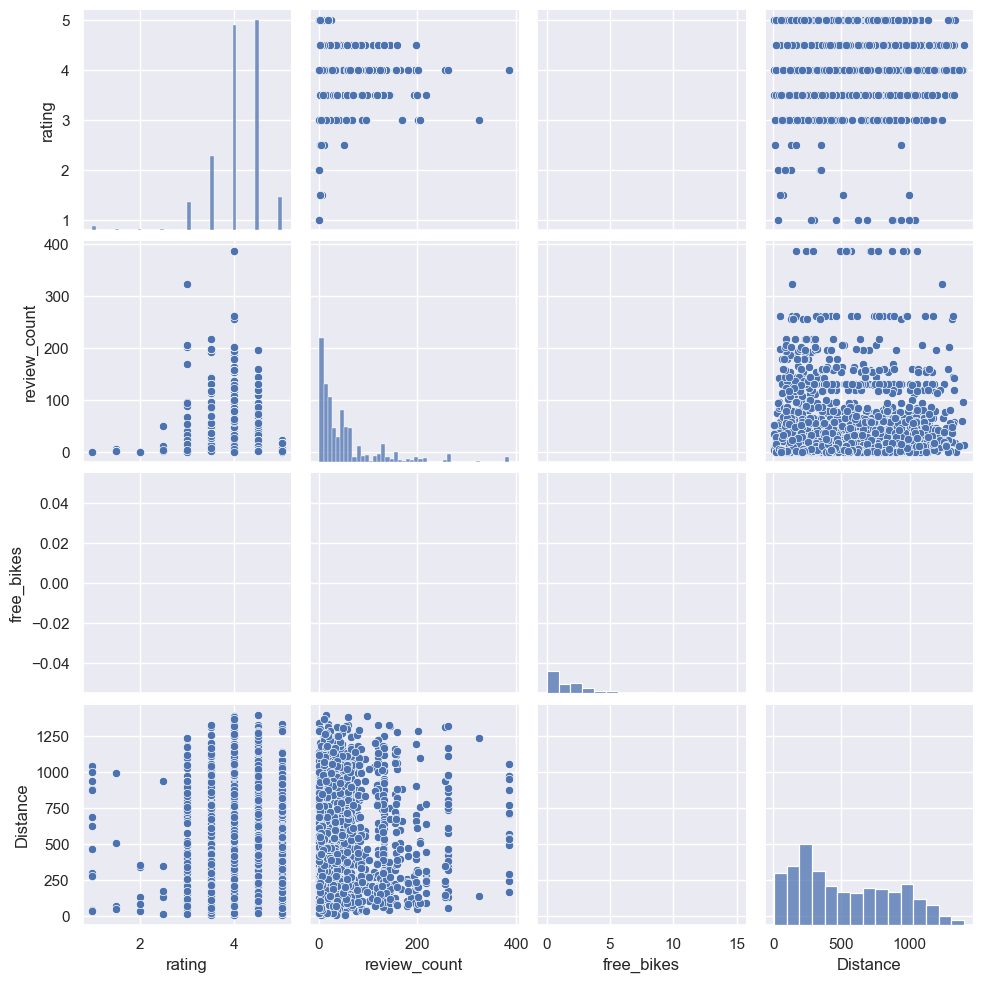

In [42]:
sns.pairplot(df_joined_data[["rating","review_count", "free_bikes","Distance"]])

plt.savefig("../images/pairplot")

In [43]:
df_joined_data.isnull().sum()

Unnamed: 0         0
name            1846
Latitude           0
Longitude          0
free_bikes      1846
Id               186
Name             186
Category           0
Distance         186
Address          209
review_count     186
rating           186
dtype: int64

In [44]:
#Making adjustments to account for null-values
df_joined_data_adjust = df_joined_data

df_joined_data_adjust["rating"].fillna(df_joined_data["rating"].mean(), inplace=True)
df_joined_data_adjust["review_count"].fillna(df_joined_data["review_count"].mean(), inplace=True)
df_joined_data_adjust["Distance"].fillna(df_joined_data["Distance"].mean(), inplace=True)
df_joined_data_adjust["free_bikes"].fillna(df_joined_data["free_bikes"].mean(), inplace=True)

In [45]:
x = df_joined_data_adjust[["rating", "review_count"]]
y = df_joined_data_adjust["free_bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             free_bikes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               1.00
Time:                        13:43:21   Log-Likelihood:                -2602.9
No. Observations:                2032   AIC:                             5212.
Df Residuals:                    2029   BIC:                             5229.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.9892      0.150     13.286      0.000       1.696       2.283
rating       -1.388e-17      0.036  -3.87e-16      1.000      -0.070       0.070
review_count -4.944e-17      0.000  -1.52e-13      1.000      -0.001       0.001
==============================================================================
Omnibus:                     2785.661   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           766235.500
Skew:                           7.674   Prob(JB):                         0.00
Kurtosis:                      96.885   Cond. No.                         622.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


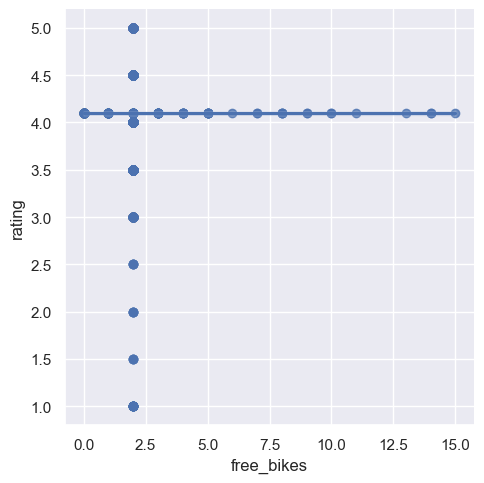

<Figure size 640x480 with 0 Axes>

In [46]:
sns.lmplot(x="free_bikes", y="rating", data= df_joined_data_adjust)

plt.show()

plt.savefig("../images/regression_rating_free")


c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


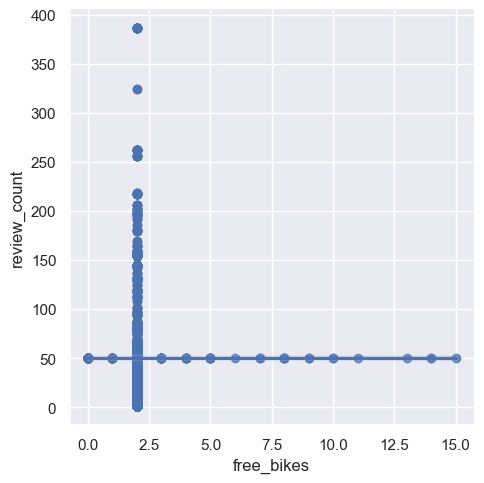

<Figure size 640x480 with 0 Axes>

In [47]:
sns.lmplot(x="free_bikes", y="review_count", data= df_joined_data_adjust)

plt.show()

plt.savefig("../images/regression_free_review_count")

In [52]:
x = df_joined_data_adjust[["rating"]]
y = df_joined_data_adjust["Distance"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distance   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     39.27
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.50e-10
Time:                        14:57:43   Log-Likelihood:                -14693.
No. Observations:                2032   AIC:                         2.939e+04
Df Residuals:                    2030   BIC:                         2.940e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.6883     56.708      3.133      0.002      66.476     288.901
rating        86.0097     13.725      6.267      0.000      59.093     112.927
==============================================================================
Omnibus:                      224.394   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.480
Skew:                           0.442   Prob(JB):                     1.14e-26
Kurtosis:                       2.207   Cond. No.                         33.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Provide model output and an interpretation of the results. 

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


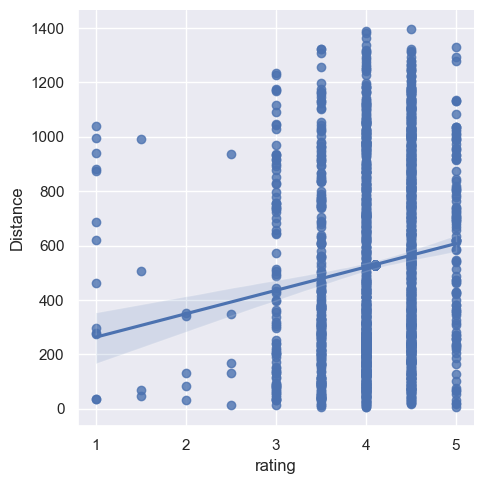

<Figure size 640x480 with 0 Axes>

In [49]:
sns.lmplot(x="rating", y="Distance", data= df_joined_data_adjust)

plt.show()

plt.savefig("../images/regression_rating_distance")

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


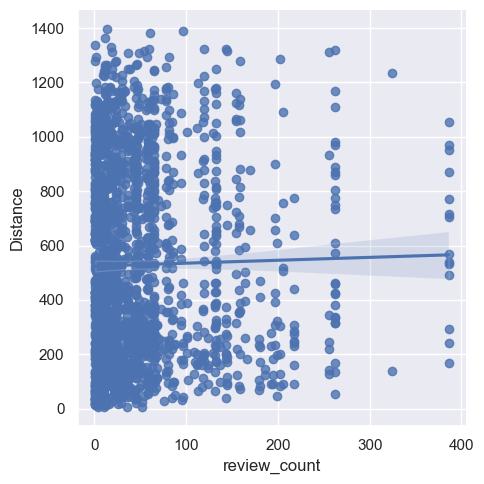

<Figure size 640x480 with 0 Axes>

In [50]:
sns.lmplot(x="review_count", y= "Distance", data= df_joined_data_adjust)

plt.show()

plt.savefig("../images/regression_rc_distance")

In [53]:
x = df_joined_data_adjust[["review_count"]]
y = df_joined_data_adjust["rating"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.078
Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0243
Time:                        14:59:55   Log-Likelihood:                -1630.6
No. Observations:                2032   AIC:                             3265.
Df Residuals:                    2030   BIC:                             3276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1191      0.016    262.084      0.000       4.088       4.150
review_count    -0.0005      0.000     -2.253      0.024      -0.001   -5.88e-05
==============================================================================
Omnibus:                      853.752   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5841.727
Skew:                          -1.835   Prob(JB):                         0.00
Kurtosis:                      10.452   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


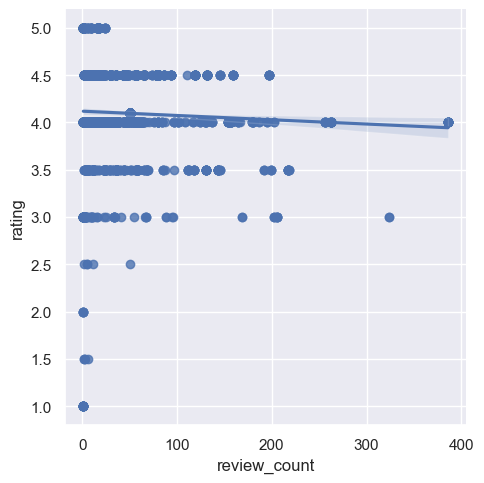

<Figure size 640x480 with 0 Axes>

In [51]:
sns.lmplot(x="review_count", y= "rating", data= df_joined_data_adjust)

plt.show()

plt.savefig("../images/regression_rc_rating")

# Stretch

How can you turn the regression model into a classification model?